## Input example for Contact Graspnet

In [2]:
import numpy as np
import os

# Directory containing the .npz files
directory = '../src/contact_graspnet/results'
npz_file = 'predictions_0.npz'
file_path = os.path.join(directory, npz_file)
data = np.load(file_path, allow_pickle=True)

data['pred_grasps_cam']

array({1.0: array([[[ 0.25270715,  0.77525395, -0.5788958 ,  0.09819905],
        [ 0.1101109 , -0.6174719 , -0.7788479 ,  0.22726125],
        [-0.96125674,  0.13307768, -0.24140349,  0.9532337 ],
        [ 0.        ,  0.        ,  0.        ,  1.        ]],

       [[-0.970906  , -0.22861779, -0.07124183,  0.10017426],
        [-0.00667395,  0.3232287 , -0.9462973 ,  0.32013008],
        [ 0.23936786, -0.91829026, -0.31535047,  0.92503345],
        [ 0.        ,  0.        ,  0.        ,  1.        ]],

       [[ 0.8158964 , -0.1822873 , -0.54871154,  0.02944003],
        [-0.5202954 ,  0.18247466, -0.83426344,  0.25546426],
        [ 0.25220162,  0.9661646 ,  0.05403716,  0.9049135 ],
        [ 0.        ,  0.        ,  0.        ,  1.        ]],

       [[ 0.5870651 ,  0.55529267, -0.58907104,  0.09533538],
        [-0.26124823, -0.5587771 , -0.7870944 ,  0.2953062 ],
        [-0.7662271 ,  0.6159694 , -0.1829693 ,  0.93739724],
        [ 0.        ,  0.        ,  0.        ,  1. 

In [11]:
# Segmentation testing
directory = '../src/contact_graspnet/test_data'
npz_file = '0.npy'
file_path = os.path.join(directory, npz_file)
data = np.load(file_path, allow_pickle=True)
print(data.item().keys())
print(type(data))
data.item()['seg']
depth_data = data.item()['depth']
print(depth_data.shape)
print(depth_data)
min_depth = np.min(depth_data)
max_depth = np.max(depth_data)
print(f"Min depth: {min_depth}, Max depth: {max_depth}")

dict_keys(['rgb', 'depth', 'K', 'seg'])
<class 'numpy.ndarray'>
(720, 1280)
[[0.    0.    0.    ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.    0.    0.   ]
 ...
 [0.768 0.768 0.768 ... 0.764 0.764 0.764]
 [0.767 0.767 0.767 ... 0.764 0.764 0.764]
 [0.767 0.767 0.767 ... 0.763 0.763 0.763]]
Min depth: 0.0, Max depth: 6.400000095367432


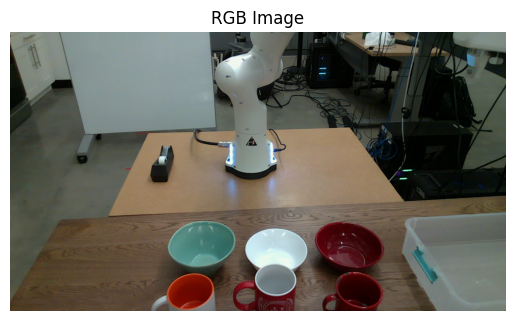

In [12]:
import matplotlib.pyplot as plt

# Display the RGB image from the 'rgb' key in the data dictionary
plt.imshow(data.item()['rgb'][:, :, ::-1])
plt.title('RGB Image')
plt.axis('off')  # Hide the axis
plt.show()

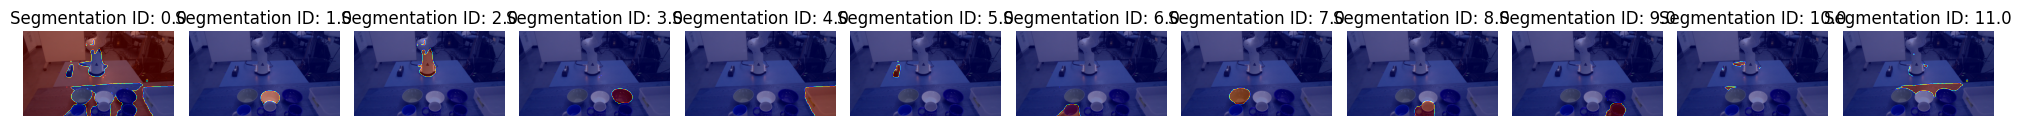

In [36]:
import matplotlib.pyplot as plt

# Assuming 'seg' is the segmentation mask from the data
segmentation_mask = data.item()['seg']

# Display the RGB image with the segmentation mask overlay
unique_values = np.unique(segmentation_mask)

fig, axes = plt.subplots(1, len(unique_values), figsize=(20, 20))

for ax, seg_id in zip(axes, unique_values):
    ax.imshow(data.item()['rgb'])
    ax.imshow(segmentation_mask == seg_id, alpha=0.5, cmap='jet')  # Overlay the segmentation mask with transparency
    ax.set_title(f'Segmentation ID: {seg_id}')
    ax.axis('off')  # Hide the axis

plt.tight_layout()
plt.show()

In [6]:
# Segmentation testing
directory = '../src/data/pipeline_results_for_cup_and_holder'
npz_file = 'contact_graspnet_input.npy'
file_path = os.path.join(directory, npz_file)
data = np.load(file_path, allow_pickle=True)
print(data.item().keys())
print(type(data))
data.item()['depth']
depth_data = data.item()['depth']
print(depth_data.shape)
print(depth_data)
min_depth = np.min(depth_data)
max_depth = np.max(depth_data)
print(f"Min depth: {min_depth}, Max depth: {max_depth}")

dict_keys(['rgb', 'depth', 'K', 'seg'])
<class 'numpy.ndarray'>
(720, 1280)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Min depth: 0, Max depth: 3236


Checking depth values in rgbd file

In [9]:
def extract_depth_from_bgrd(file_path):
    data = np.load(file_path, allow_pickle=True)
    depth_data = data[:, :, 3]  # Assuming the depth channel is the 4th channel in BGRD format
    return depth_data

# Example usage

depth_data = extract_depth_from_bgrd('../src/data/pipeline_results_for_cup_and_holder/rgbd.npy')
print(depth_data.shape)
print(depth_data)
print(f"Min depth: {np.min(depth_data)}, Max depth: {np.max(depth_data)}")
print(f"Type of the values in depth_data: {depth_data.dtype}")

(720, 1280)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Min depth: 0, Max depth: 3236
Type of the values in depth_data: uint16


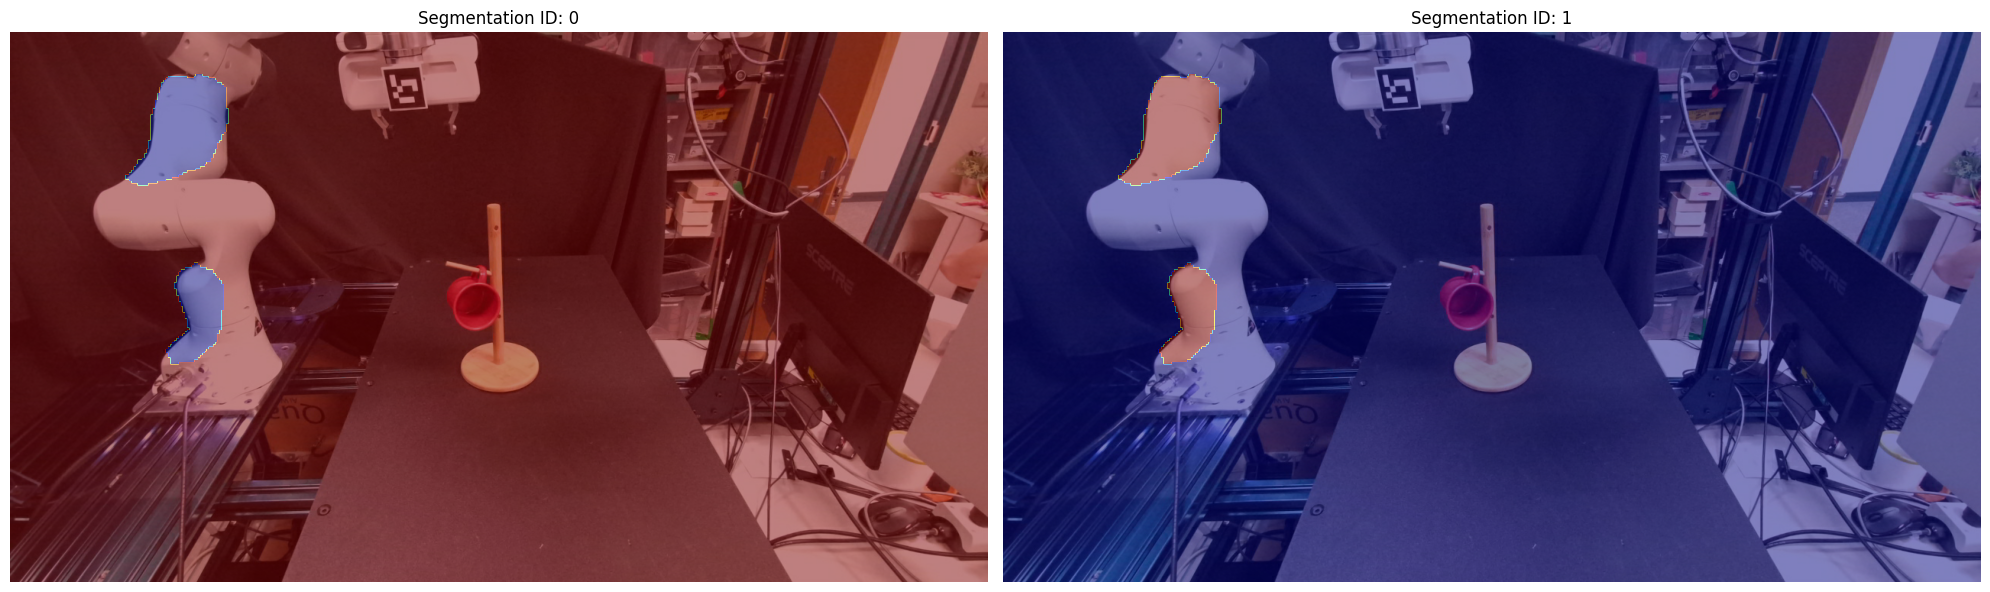

In [59]:
import matplotlib.pyplot as plt

# Assuming 'seg' is the segmentation mask from the data
segmentation_mask = data.item()['seg']

# Display the RGB image with the segmentation mask overlay
unique_values = np.unique(segmentation_mask)

fig, axes = plt.subplots(1, len(unique_values), figsize=(20, 20))

for ax, seg_id in zip(axes, unique_values):
    ax.imshow(data.item()['rgb'])
    ax.imshow(segmentation_mask == seg_id, alpha=0.5, cmap='jet')  # Overlay the segmentation mask with transparency
    ax.set_title(f'Segmentation ID: {seg_id}')
    ax.axis('off')  # Hide the axis

plt.tight_layout()
plt.show()

## Processing of our own images

Our input will be an RGBD file together with the camera matrix

In [50]:
camera_matrix = np.array([[613.32427146,  0.,        633.94909346],
       [ 0.,        614.36077155, 363.33858573],
       [ 0.,          0.,          1.       ]])
directory = 'images/'
npy_file = 'holder_raw.npy'
file_path = os.path.join(directory, npy_file)

### 1. Infer affordance mask

### Convert into input for Contact Graspnet

In [52]:
directory = '../src/contact_graspnet/test_data'
npz_file = 'holder.npy'
def process_rgbd_file(directory, npz_file, camera_matrix, color_order='rgb'):
    file_path = os.path.join(directory, npz_file)
    data = np.load(file_path, allow_pickle=True)
    
    if color_order == 'rgb':
        rgb_data = data[:, :, :3]  # Extract RGB channels
    elif color_order == 'bgr':
        rgb_data = data[:, :, 2::-1]  # Extract BGR channels and reverse to RGB
    else:
        raise ValueError("Invalid color_order. Use 'rgb' or 'bgr'.")

    
    # Segmentation mask
    


    # Transform the data into a dictionary
    transformed_data = {
        'rgb': rgb_data,
        'depth': data[:, :, 3],  # Extract depth channel
        'K': camera_matrix  # Camera matrix
    }

    # Save the processed data 
    processed_file_path = os.path.join(directory, npz_file.replace('.npy', '_processed.npy'))
    np.save(processed_file_path, transformed_data)
    
    return transformed_data

# Call the function
transformed_data = process_rgbd_file(directory, npz_file, camera_matrix, 'bgr')

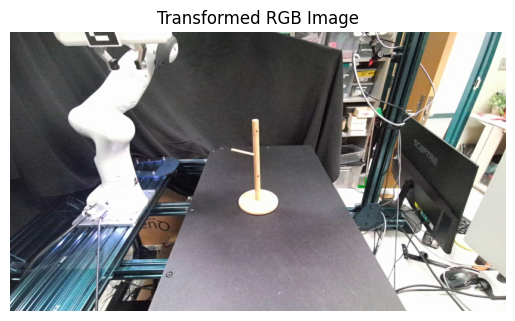

In [53]:
import matplotlib.pyplot as plt

# Display the RGB image from the transformed data
plt.imshow(transformed_data['rgb'])
plt.title('Transformed RGB Image')
plt.axis('off')  # Hide the axis
plt.show()

In [54]:
import torch
import sys
sys.path.append('../src/sam2')
from sam2.sam2.build_sam import build_sam2
from sam2.sam2.sam2_image_predictor import SAM2ImagePredictor

checkpoint = "./checkpoints/sam2.1_hiera_large.pt"
model_cfg = "configs/sam2.1/sam2.1_hiera_l.yaml"
predictor = SAM2ImagePredictor(build_sam2(model_cfg, checkpoint))

rgb_image = transformed_data['rgb']  # Use your RGB data

with torch.inference_mode(), torch.autocast("cuda", dtype=torch.bfloat16):
    predictor.set_image(rgb_image)
    masks, _, _ = predictor.predict()

    # Display the predicted masks
    fig, ax = plt.subplots(1, len(masks), figsize=(20, 20))

    for i, mask in enumerate(masks):
        ax[i].imshow(rgb_image)
        ax[i].imshow(mask, alpha=0.5, cmap='jet')  # Overlay the mask with transparency
        ax[i].set_title(f'Mask {i}')
        ax[i].axis('off')  # Hide the axis

    plt.tight_layout()
    plt.show()

ModuleNotFoundError: No module named 'sam2.modeling'

In [6]:
# Read an npy file from the specified directory
import numpy as np
file_path = '/home/jacinto/robot-grasp/data/rgbds/cup_and_holder.npy'
data = np.load(file_path, allow_pickle=True)

# Display the keys and type of the loaded data
print(data)
depth_data = data[:, :, 3]
print(f"Min depth: {np.min(depth_data)}, Max depth: {np.max(depth_data)}")
print(type(data))

[[[ 37  34  29   0]
  [ 37  34  29   0]
  [ 40  37  32   0]
  ...
  [201 220 241   0]
  [200 222 234   0]
  [198 220 232   0]]

 [[ 38  35  31   0]
  [ 38  35  31   0]
  [ 38  35  31   0]
  ...
  [196 219 235   0]
  [196 221 231   0]
  [195 220 230   0]]

 [[ 39  35  34   0]
  [ 38  34  33   0]
  [ 38  34  33   0]
  ...
  [192 219 229   0]
  [197 219 230   0]
  [198 220 231   0]]

 ...

 [[ 45  35  25   0]
  [ 47  37  27   0]
  [ 50  40  30   0]
  ...
  [218 226 233   0]
  [219 227 234   0]
  [219 227 234   0]]

 [[ 44  34  24   0]
  [ 47  37  27   0]
  [ 49  39  29   0]
  ...
  [221 227 232   0]
  [219 228 232   0]
  [219 228 232   0]]

 [[ 43  33  23   0]
  [ 47  37  27   0]
  [ 48  38  28   0]
  ...
  [223 228 231   0]
  [221 228 231   0]
  [221 228 231   0]]]
Min depth: 0, Max depth: 3236
<class 'numpy.ndarray'>
